In [4]:
import numpy as np

# Problem 1)

In [5]:
# MNIST 데이터셋 로딩
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [6]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

* 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
knn_grid.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

# Problem 2)

In [8]:
from scipy.ndimage.interpolation import shift

def shift_image(image, dx, dy):
  # 각 그림은 28*28 픽셀로 이루어져 있음
    image = image.reshape((28, 28))
  # 그림을 각각 옆으로 dx만큼, 아래로 dy 만큼 이동시킨다. 
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
  # 앞서, 형태를 2차원으로 바꿨으므로, 다시 1차원으로 바꾼다.
    return shifted_image.reshape([-1])

1)  한 픽셀 이동시키기

In [9]:
import matplotlib.pyplot as plt

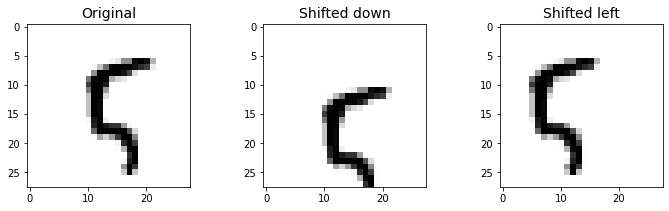

In [10]:
image = X_train[100] 
# 아래로 5픽셀 이동시킨다.
shifted_image_down = shift_image(image, 0, 5)
# 왼쪽으로 5픽셀 이동시킨다.
shifted_image_left = shift_image(image, -5, 0)

# 28*28 픽셀이므로, 자료를 reshape(28,28)하여 그린다.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [11]:
# train 자료 속 이미지와 라벨을 변수에 저장한다. 
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 네 개의 방향으로 각각 이동시킨 후, 생성한 변수에 저장한다.
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy)) #이미지 이동
        y_train_augmented.append(label) #이동 후, 저장

# 모델링에 자료를 사용하기 위해 각각 배열로 저장한다.
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

* shape를 통해 자료 수의 증가를 파악할 수 있다. 
* 5배로 자료가 증식된다.

In [12]:
X_train.shape

(60000, 784)

In [13]:
X_train_augmented.shape

(300000, 784)

* 자료를 무작위로 섞는다.

In [14]:
# permutation은 array를 복사해서 셔플을 한다
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

2) 최적 모형에 적용하기. (실행 시간이 매우 길어서, 코드만 작성.)

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

=> 코드를 실행할 경우, 
간단히 데이터를 증식해서 0.5% 정확도를 높아진다.